<a href="https://colab.research.google.com/github/Surajpatra700/Deep-Learning_Project/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

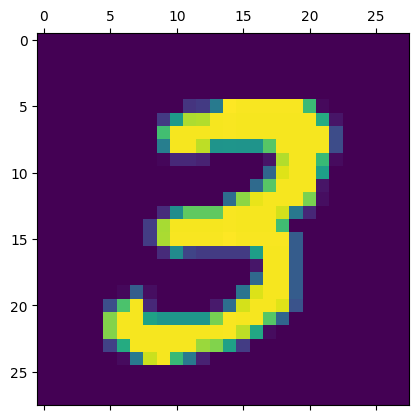

In [5]:
plt.matshow(X_train[7])

In [6]:
y_train[7]

3

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
X_train = X_train/255      # Converting value of pixels between 0 to 1
X_test = X_test/255
X_train[5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
# sequential means stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.3812 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1840 - accuracy: 0.8773
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6980 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4878 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4708 - accuracy: 0.8871


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 6.0333 - accuracy: 0.8799


[6.033283233642578, 0.8798999786376953]

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 1ms/step


array([0.43469688, 0.5393535 , 0.5362742 , 0.46144262, 0.51658595,
       0.66845834, 0.4659047 , 0.57599247, 0.36390552, 0.4668849 ],
      dtype=float32)

In [30]:
# It will find the maximum value and return us the index of that value
np.argmax(y_predicted[4])

5

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:3]

[5, 5, 5]

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

<Axes: >

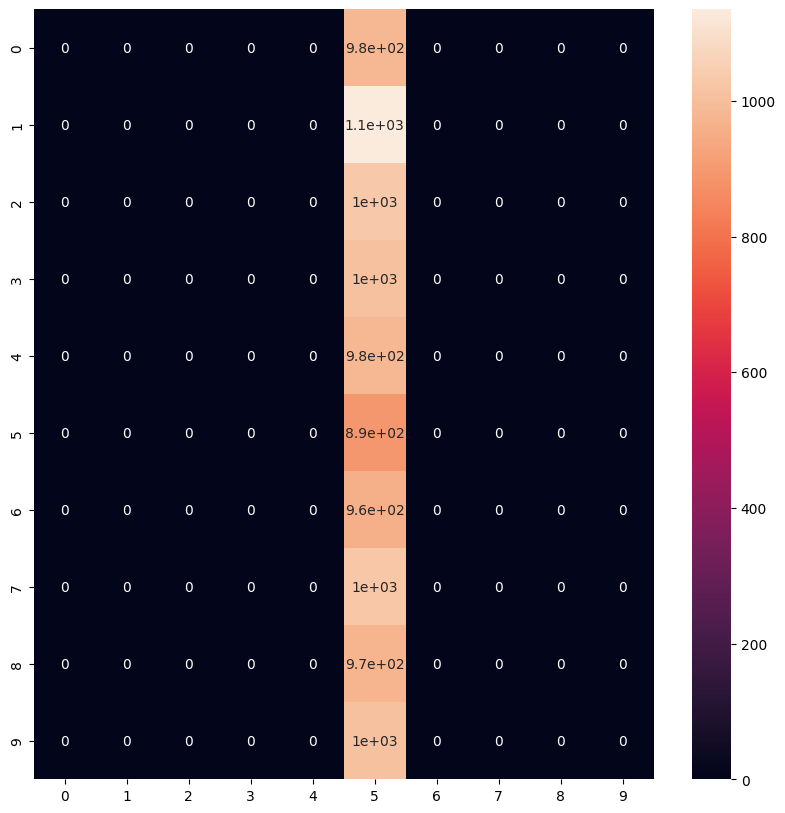

In [43]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3015 - accuracy: 0.1122
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1124


In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.1135


[2.3011515140533447, 0.11349999904632568]